# Homework 7
## Caleb Maddry

In [92]:
# Importing of packages
import math 
import numpy as np 
import matplotlib.pyplot as plt
import pandoc
import time 

# Subpackages
from numpy.linalg import inv
from numpy.linalg import norm 
from fractions import Fraction

#### Question 1

In [93]:
def  eval_monomial(xeval,coef,N,Neval):

    yeval = coef[0]*np.ones(Neval+1)
    
    for j in range(1,N+1):
      for i in range(Neval+1):
        yeval[i] = yeval[i] + coef[j]*xeval[i]**j

    return yeval

   
def Vandermonde(xint,N):

    V = np.zeros((N+1,N+1))
    
    ''' fill the first column'''
    for j in range(N+1):
       V[j][0] = 1.0

    for i in range(1,N+1):
        for j in range(N+1):
           V[j][i] = xint[j]**i

    return V  

Coefficients for N = 17 [ 1.00000000e+00 -5.82280524e-11 -5.58183169e+01  8.70556358e-10
  1.26285076e+03 -1.44381268e-08 -1.30683142e+04  1.01207178e-07
  6.91874450e+04 -3.42719995e-07 -1.98367571e+05  5.93442064e-07
  3.09141258e+05 -5.03383364e-07 -2.44597241e+05  1.65079108e-07
  7.64964007e+04]


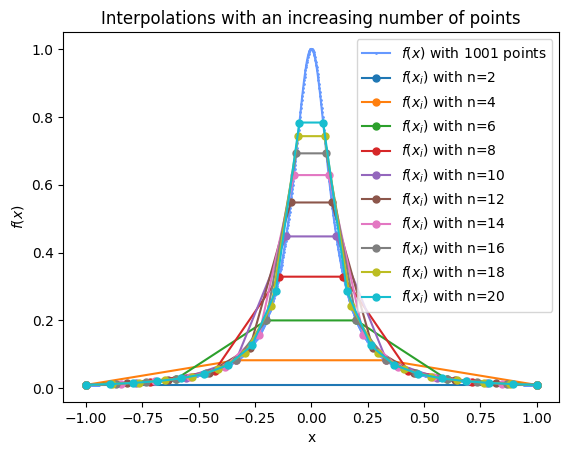

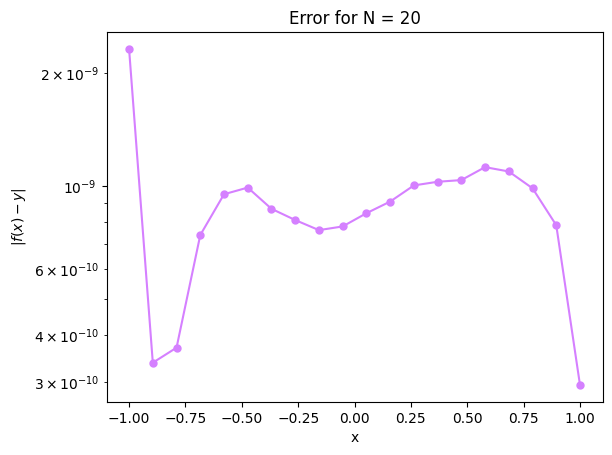

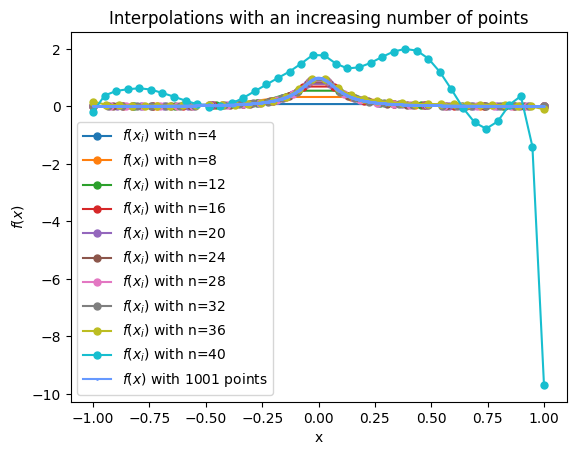

In [94]:
### 1 b)
def f(x): return 1/(1 + (10*x)**2)

N = 17
i = np.arange(1, N + 1, 1)

h = 2/(N - 1);
xi = -1 + (i - 1)*h

V = Vandermonde(xi, N - 1)
Vinv = inv(V)
    
coef = Vinv @ f(xi) 

print("Coefficients for N = 17", coef)


# Generic plot of f
x = np.arange(-1, 1, 1/500)
plt.plot(x, f(x), 
         marker='o',
         markersize=1,
         color='#6699ff',
         label=r"$f(x)$ with 1001 points")

for idx in range(10):

    N = (idx + 1)*2
    i = np.arange(1, N + 1, 1)

    h = 2/(N - 1);
    xi = -1 + (i - 1)*h
    
    V = Vandermonde(xi, N - 1)
    Vinv = inv(V)
        
    coef = Vinv @ f(xi) 

    y = eval_monomial(xi, coef, N - 1, N - 1)

    plt.plot(xi, y, 
            marker='o',
            markersize=5,
            label=r"$f(x_i)$ with n=" + str(N))
    

plt.title(r"Interpolations with an increasing number of points")
plt.xlabel("x")
plt.ylabel(r"$f (x)$")
plt.legend()
plt.show()


plt.semilogy(xi, abs(y - f(xi)),
         color="#d580ff",
         marker = 'o',
         markersize = 5)
plt.title(r"Error for N = 20")
plt.xlabel("x")
plt.ylabel(r"$| f(x) - y |$")
plt.show()

for idx in range(10):

    N = (idx + 1)*4
    i = np.arange(1, N + 1, 1)

    h = 2/(N - 1);
    xi = -1 + (i - 1)*h
    
    V = Vandermonde(xi, N - 1)
    Vinv = inv(V)
        
    coef = Vinv @ f(xi) 

    y = eval_monomial(xi, coef, N - 1, N - 1)

    plt.plot(xi, y, 
            marker='o',
            markersize=5,
            label=r"$f(x_i)$ with n=" + str(N))
    
plt.plot(x, f(x), 
         marker='o',
         markersize=1,
         color='#6699ff',
         label=r"$f(x)$ with 1001 points")

plt.title(r"Interpolations with an increasing number of points")
plt.xlabel("x")
plt.ylabel(r"$f (x)$")
plt.legend()
plt.show()

#### Question 2

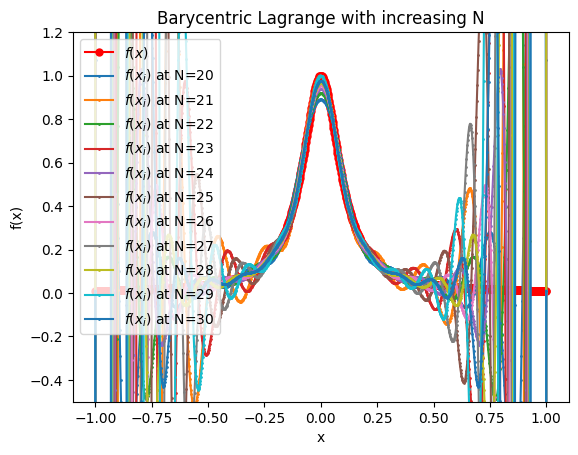

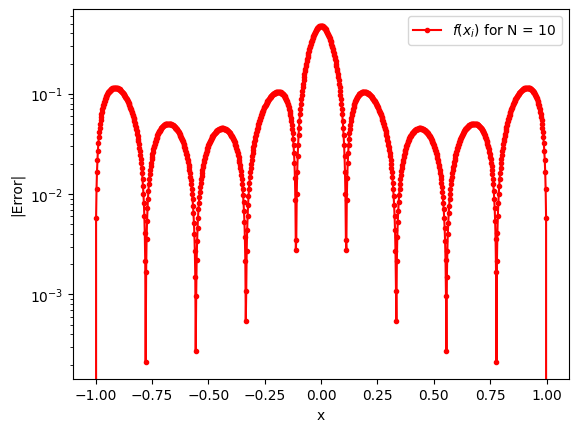

In [98]:
def eval_lagrange(xeval,xint,yint,N):

    lj = np.ones(N+1)
    
    for count in range(N+1):
       for jj in range(N+1):
           if (jj != count):
              lj[count] = lj[count]*(xeval - xint[jj])/(xint[count]-xint[jj])

    yeval = 0.
    
    for jj in range(N+1):
       yeval = yeval + yint[jj]*lj[jj]
  
    return(yeval)


# create points for evaluating the Lagrange interpolating polynomial'
Neval = 1000
a = -1
b = 1
xeval = np.linspace(a,b,Neval+1)
yeval = np.zeros(Neval+1)

# Plotting of the real values
plt.plot(xeval, f(xeval),
         marker='o',
         markersize=5,
         color='red',
         label=r"$f(x)$")

for idx in range(11):
   # Initial conditions
   N = idx + 20

   # create equispaced interpolation nodes
   xint = np.linspace(a, b, N+1)

   i = np.arange(1, N + 2, 1)

   h = 2/(N - 1);
   xi = -1 + (i - 1)*h

   xint = xi

   # create interpolation data
   yint = f(xint)

   # Initialize and populate the first columns of the divided difference matrix. We will pass the x vector
   y = np.zeros( (N+1, N+1) )
   for j in range(N+1):
      y[j][0]  = yint[j]

   # Evaluation of the Lagrange polynomial
   for kk in range(Neval+1):
      yeval[kk] = eval_lagrange(xeval[kk],xint,yint,N)

   if N == 10: err_l = abs(yeval - f(xeval)) 

   # Plotting of the interpolation
   plt.plot(xeval,yeval,
            marker='o',
            markersize=1,
            label=r"$f(x_i)$ at N=" + str(N))
plt.ylim([-0.5, 1.2])
plt.title("Barycentric Lagrange with increasing N")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

# Plotting of the error from barycentric lagrange
plt.semilogy(xeval,err_l,
         marker='o',
         markersize=3,
         color='red',
         label=r'$f(x_i)$ for N = 10')
plt.xlabel("x")
plt.ylabel("|Error|")
plt.legend()
plt.show()

#### Question 3

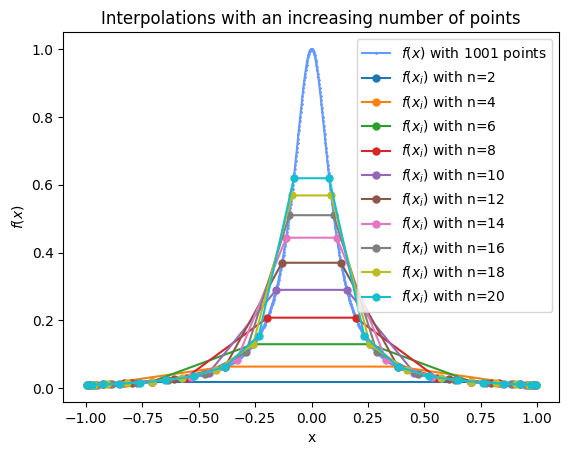

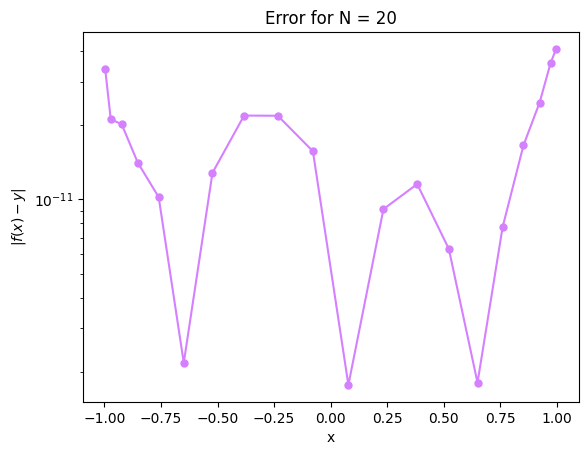

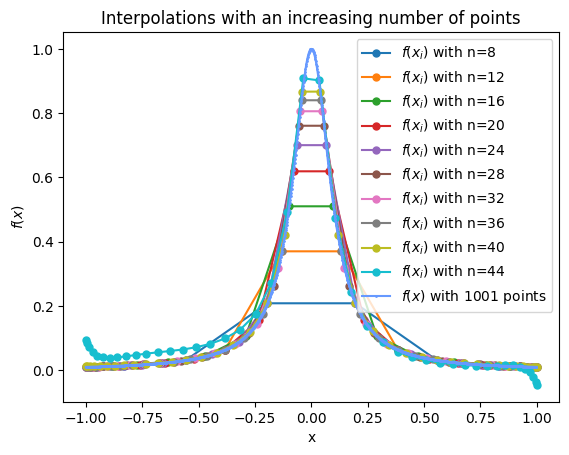

In [60]:
# Generic plot of f
x = np.arange(-1, 1, 1/500)
plt.plot(x, f(x), 
         marker='o',
         markersize=1,
         color='#6699ff',
         label=r"$f(x)$ with 1001 points")

for idx in range(10):

    N = (idx + 1)*2
    j = np.arange(1, N + 1, 1)

    xj = np.cos(((2*j - 1)*np.pi)/(2*N))
    
    V = Vandermonde(xj, N - 1)
    Vinv = inv(V)
        
    coef = Vinv @ f(xj) 

    y = eval_monomial(xj, coef, N - 1, N - 1)

    plt.plot(xj, y, 
            marker='o',
            markersize=5,
            label=r"$f(x_i)$ with n=" + str(N))

plt.title(r"Interpolations with an increasing number of points")
plt.xlabel("x")
plt.ylabel(r"$f (x)$")
plt.legend()
plt.show()

plt.semilogy(xj, abs(y - f(xj)),
         color="#d580ff",
         marker = 'o',
         markersize = 5)
plt.title(r"Error for N = 20")
plt.xlabel("x")
plt.ylabel(r"$| f(x) - y |$")
plt.show()

for idx in range(10):

    N = (idx + 2)*4
    j = np.arange(1, N + 1, 1)

    xj = np.cos(((2*j - 1)*np.pi)/(2*N))
    
    V = Vandermonde(xj, N - 1)
    Vinv = inv(V)
        
    coef = Vinv @ f(xj) 

    y = eval_monomial(xj, coef, N - 1, N - 1)

    plt.plot(xj, y, 
            marker='o',
            markersize=5,
            label=r"$f(x_i)$ with n=" + str(N))
    
plt.plot(x, f(x), 
        marker='o',
        markersize=1,
        color='#6699ff',
        label=r"$f(x)$ with 1001 points")

plt.title(r"Interpolations with an increasing number of points")
plt.xlabel("x")
plt.ylabel(r"$f (x)$")
plt.legend()
plt.show()